In [1]:
%load_ext rpy2.ipython
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import mode,skew,skewtest

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression,LogisticRegression
import xgboost as xgb

/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: Setting LC_MESSAGES failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 4: Setting LC_MONETARY failed

In [2]:
train=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/Dengue Prediction/dengue_features_train.csv')
train_labels=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/Dengue Prediction/dengue_labels_train.csv')
test=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/Dengue Prediction/dengue_features_test.csv')

In [3]:
data=pd.concat([train,test])

In [4]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
data.columns

Index([u'city', u'year', u'weekofyear', u'week_start_date', u'ndvi_ne',
       u'ndvi_nw', u'ndvi_se', u'ndvi_sw', u'precipitation_amt_mm',
       u'reanalysis_air_temp_k', u'reanalysis_avg_temp_k',
       u'reanalysis_dew_point_temp_k', u'reanalysis_max_air_temp_k',
       u'reanalysis_min_air_temp_k', u'reanalysis_precip_amt_kg_per_m2',
       u'reanalysis_relative_humidity_percent',
       u'reanalysis_sat_precip_amt_mm',
       u'reanalysis_specific_humidity_g_per_kg', u'reanalysis_tdtr_k',
       u'station_avg_temp_c', u'station_diur_temp_rng_c',
       u'station_max_temp_c', u'station_min_temp_c', u'station_precip_mm'],
      dtype='object')

In [6]:
data.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [7]:
data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_mi

In [8]:
city=test['city']
year=test['year']
week_of_year=test['weekofyear']

In [9]:
data['city'].value_counts()

sj    1196
iq     676
Name: city, dtype: int64

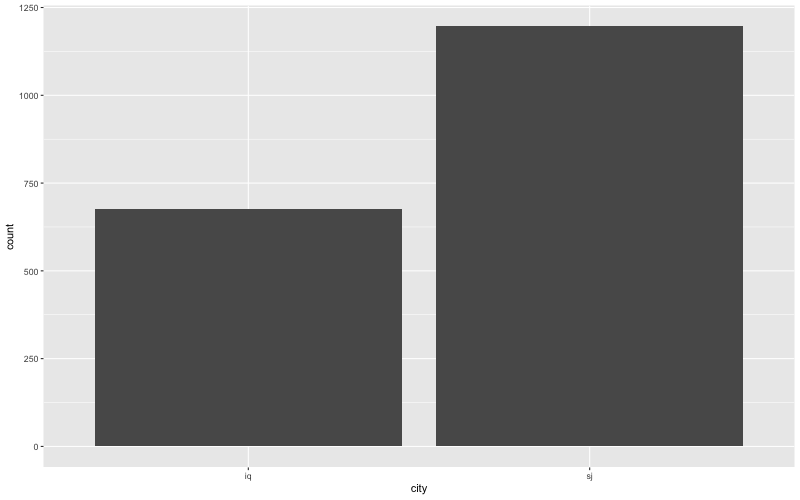

In [10]:
%%R -i data -h 500 -w 800
library('ggplot2')
ggplot(data, aes(x=city))+
geom_bar()

In [11]:
dummy_city=pd.get_dummies(data['city'])
data['city1']=dummy_city['sj']
data['city2']=dummy_city['iq']
data.drop('city',1,inplace=True)

In [12]:
data['weekofyear'].head(5)

0    18
1    19
2    20
3    21
4    22
Name: weekofyear, dtype: int64

In [13]:
data.drop('week_start_date',1,inplace=True)

In [14]:
store=pd.HDFStore('store.h5')
store['df']=data

In [15]:
def remove_missing_values(column, model, na_columns):
    columns=[col for col in na_columns if col!=column]
    df=store['df']
    for col in columns:
        if df.dtypes[col] == 'float64':
            df[col].fillna(df[col].mean(),inplace=True)
        else:
            df[col].fillna(df[col].median(),inplace=True)
    
    na_indexes=df[column].isnull()
    train,test=df[~na_indexes],df[na_indexes]
    x_train,y_train=train.drop(column,1), train[column]
    x_test,y_test=test.drop(column,1), test[column]
    
    if model=='r':
        rforest=RandomForestRegressor(n_estimators=100)
        rforest.fit(x_train,y_train)
        y_test=rforest.predict(x_test)
    if model=='c':
        rforest=RandomForestClassifier(n_estimators=100)
        rforest.fit(x_train,y_train)
        y_test=rforest.predict(x_test)
        
    return pd.Series(y_test)

In [16]:
na_columns=[col for col in data.columns if dict(data.isnull().sum())[col]!=0]


for col in na_columns:
    if data.dtypes[col] != 'object':
        values=remove_missing_values(col,'r',na_columns)
        data[col][pd.isnull(data[col])]=values
        print col+' '+'Done'
    else:
        values=remove_missing_values(col,'c')

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ndvi_ne Done
ndvi_nw Done
ndvi_se Done
ndvi_sw Done
precipitation_amt_mm Done
reanalysis_air_temp_k Done
reanalysis_avg_temp_k Done
reanalysis_dew_point_temp_k Done
reanalysis_max_air_temp_k Done
reanalysis_min_air_temp_k Done
reanalysis_precip_amt_kg_per_m2 Done
reanalysis_relative_humidity_percent Done
reanalysis_sat_precip_amt_mm Done
reanalysis_specific_humidity_g_per_kg Done
reanalysis_tdtr_k Done
station_avg_temp_c Done
station_diur_temp_rng_c Done
station_max_temp_c Done
station_min_temp_c Done
station_precip_mm Done


In [17]:
#We have successfully imputed the values using random forests

data.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
city1                                    0
city2      

In [18]:
#Since all the features are numerical we will run a basic random forest to calculate the feature importances

train_df=data[0:1456]
test_df=data[1456:]

train_df['labels']=train_labels['total_cases']

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
basic_rf=RandomForestRegressor(n_estimators=100)
basic_rf.fit(train_df.drop('labels',1),train_df['labels'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

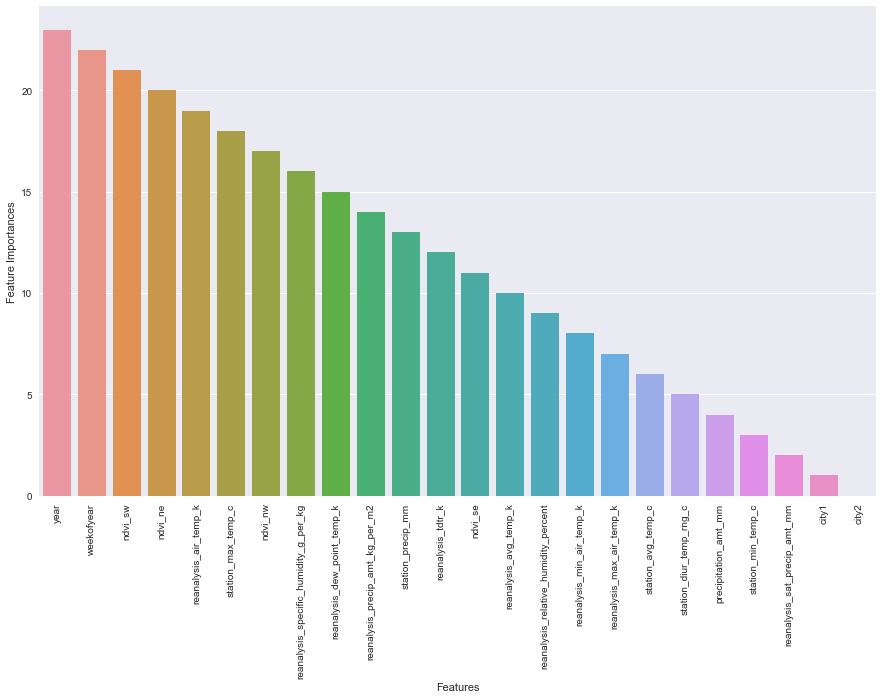

In [20]:
importances=basic_rf.feature_importances_
indices=np.argsort(importances)[::-1]
features=train_df.drop('labels',1).columns
plt.figure(figsize = (15,9))
ax=sns.barplot(x=importances[indices],y=range(len(indices)))
ax = plt.xticks(range(len(indices)),features[indices],rotation=90)
plt.ylabel('Feature Importances')
plt.xlabel('Features')

In [21]:
#Now we know the basic feature importances. Let us visualize the datasets and the relation between the labels

train_df['year'].value_counts()

2001    104
2003    104
2002    104
2007    104
2006    104
2005    104
2004    104
2000     78
2008     69
1991     52
2009     52
1999     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1990     35
2010     26
Name: year, dtype: int64

/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "city1". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "city2". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))


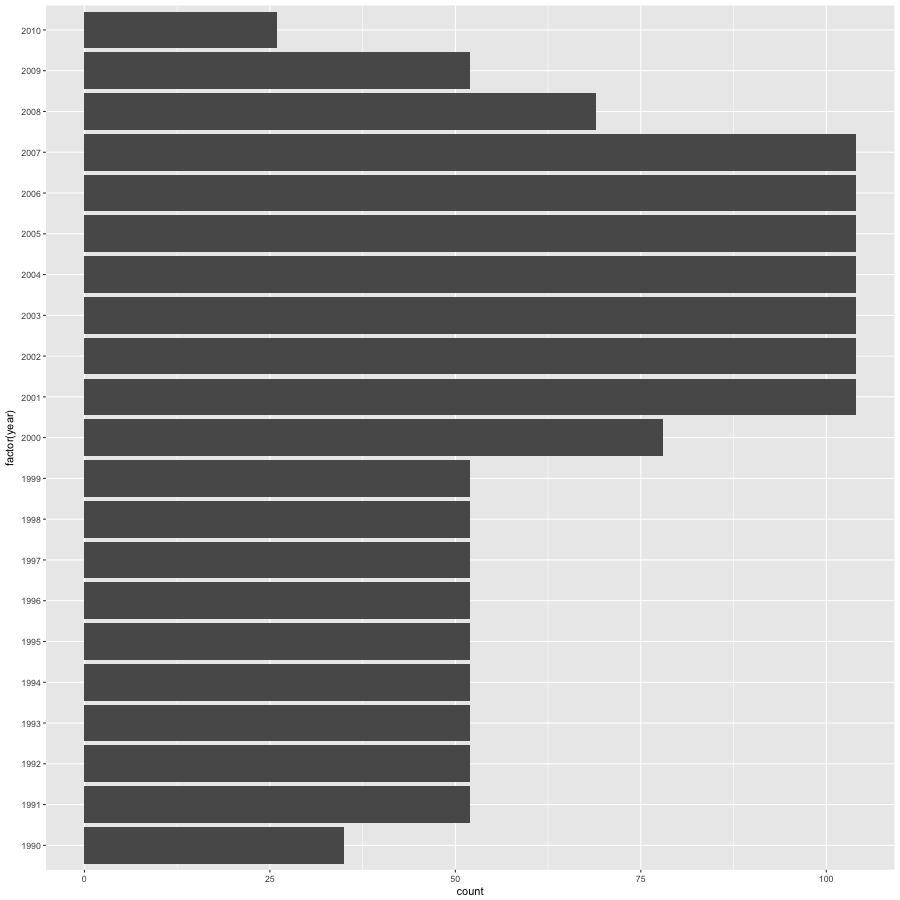

In [22]:
%%R -i train_df -h 900 -w 900
ggplot(train_df, aes(x=factor(year)))+
geom_bar()+
coord_flip()

/Users/adityavyas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

  warnings.warn(x, RRuntimeWarning)


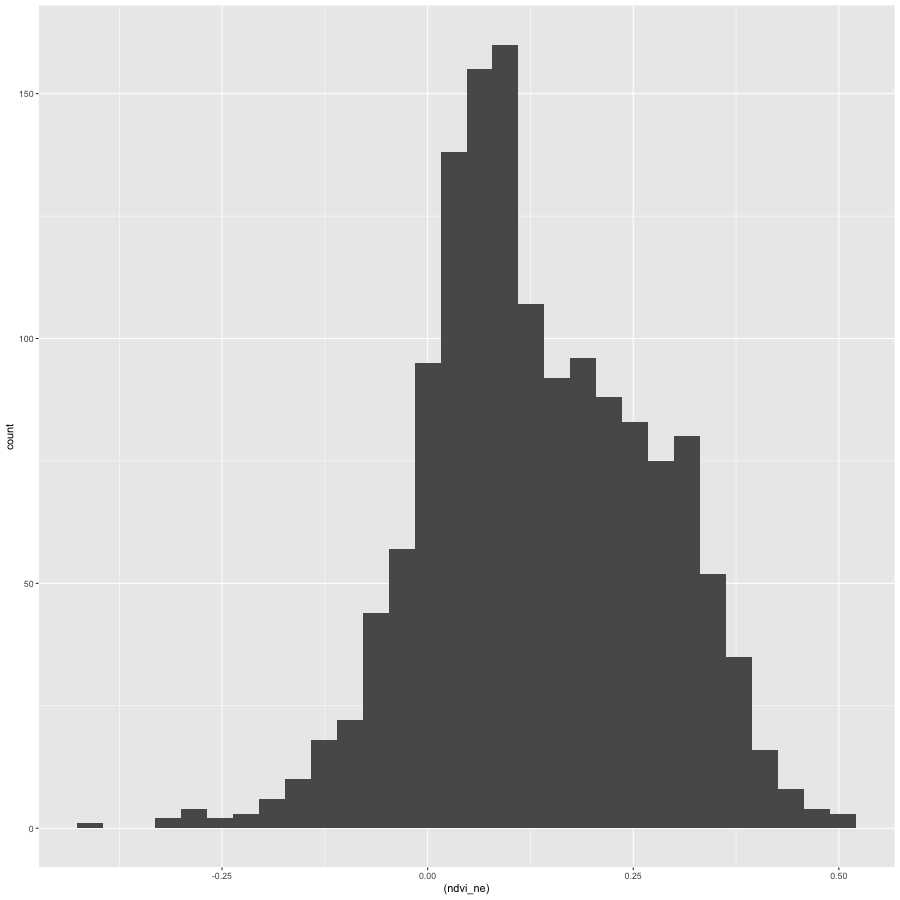

In [23]:
%%R -i train_df -h 900 -w 900
ggplot(train_df, aes(x=(ndvi_ne)))+
geom_histogram()

In [24]:
def remove_outliers(df):
    columns=[col for col in df.select_dtypes(['float64']).columns if col !='labels']
    for cols in columns:
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR=np.abs(Q1-Q3)
        lb=Q1-1.5*IQR
        ub=Q3+1.5*IQR
        df[col][(df[col]<=lb) & (df[col]>=ub)]=df[col].mean()  
    return df

train_df=remove_outliers(train_df)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/adityavyas/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
#Now let us see how the data varies

train_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city1,city2,labels
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.132020,0.129014,0.203677,0.202020,45.745355,298.700652,299.227094,295.246824,...,16.746487,4.909054,27.180177,8.104706,32.459389,22.100370,39.489776,0.642857,0.357143,24.675137
std,5.408314,15.019437,0.136478,0.118463,0.073313,0.083303,43.520094,1.357817,1.257506,1.522561,...,1.537185,3.547076,1.277246,2.125051,1.947294,1.566715,47.314072,0.479322,0.479322,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,13.750000,0.040212,0.049375,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,...,15.561429,2.328571,26.326162,6.528571,31.100000,21.100000,8.700000,0.000000,0.000000,5.000000
50%,2002.000000,26.500000,0.112475,0.118379,0.195907,0.188018,38.710000,298.627857,299.307143,295.625714,...,17.065000,2.857143,27.400000,7.371429,32.800000,22.200000,24.150000,1.000000,0.000000,12.000000
75%,2005.000000,39.250000,0.231908,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,...,17.974643,7.646429,28.128571,9.650000,33.900000,23.300000,53.900000,1.000000,1.000000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,1.000000,1.000000,461.000000


In [26]:
scaler=StandardScaler(with_mean=True,with_std=True)
labels=train_df['labels']
train_scaled_features=scaler.fit_transform(train_df.drop('labels',1))
test_scaled_features=scaler.fit_transform(test_df)

scaled_train=pd.DataFrame(train_scaled_features,index=train_df.index, columns=train_df.drop('labels',1).columns)
scaled_test=pd.DataFrame(test_scaled_features,index=test_df.index, columns=test_df.columns)

scaled_train['labels']=labels

In [27]:
scaled_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city1,city2,labels
count,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,...,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1456.000000
mean,-4.980753e-16,-1.544095e-18,-5.999474e-16,-8.997687e-17,1.056084e-16,3.133940e-16,-7.150492e-16,-1.347686e-14,2.677879e-15,6.154380e-15,...,-1.435665e-15,-1.220025e-17,9.899552e-16,-3.196466e-16,-1.958141e-15,-5.845256e-16,-2.156776e-16,1.071335e-14,-1.071335e-14,24.675137
std,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,...,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,43.596000
min,-2.040448e+00,-1.698612e+00,-3.945368e+00,-4.940891e+00,-2.991089e+00,-3.187987e+00,-1.051493e+00,-2.994759e+00,-3.447876e+00,-3.681883e+00,...,-3.273843e+00,-1.001707e+00,-4.527055e+00,-1.683425e+00,-2.958653e+00,-4.725118e+00,-8.349174e-01,-1.341641e+00,-7.453560e-01,0.000000
25%,-7.456998e-01,-8.494204e-01,-6.729255e-01,-6.724957e-01,-6.556588e-01,-6.881099e-01,-8.225545e-01,-7.629952e-01,-7.659119e-01,-7.335340e-01,...,-7.711926e-01,-7.277457e-01,-6.688671e-01,-7.419475e-01,-6.983312e-01,-6.387339e-01,-6.509766e-01,-1.341641e+00,-7.453560e-01,5.000000
50%,1.791204e-01,-2.287200e-04,-1.432619e-01,-8.980231e-02,-1.060153e-01,-1.681386e-01,-1.617132e-01,-5.363020e-02,6.367874e-02,2.489361e-01,...,2.072766e-01,-5.786784e-01,1.721663e-01,-3.451820e-01,1.749749e-01,6.361339e-02,-3.243231e-01,7.453560e-01,-7.453560e-01,12.000000
75%,7.340125e-01,8.489629e-01,7.321503e-01,7.035069e-01,5.914313e-01,5.291259e-01,5.586039e-01,8.301818e-01,7.796269e-01,7.944921e-01,...,7.992389e-01,7.719921e-01,7.427860e-01,7.274296e-01,7.400553e-01,7.659607e-01,3.046699e-01,7.453560e-01,1.341641e+00,28.000000
max,1.658833e+00,1.764758e+00,2.758441e+00,2.747908e+00,4.566079e+00,4.130901e+00,7.926755e+00,2.578072e+00,2.944518e+00,2.104530e+00,...,2.417548e+00,3.135917e+00,2.835058e+00,3.622472e+00,5.003844e+00,2.234505e+00,1.065187e+01,7.453560e-01,1.341641e+00,461.000000


In [28]:
#We now apply PCA on the data. We arrange the columns according to the random forest importances

labels=scaled_train['labels']
scaled_train.drop('labels',1,inplace=True)
scaled_train=scaled_train.reindex_axis(train_df.drop('labels',1).columns[indices],axis=1)
scaled_train['labels']=labels

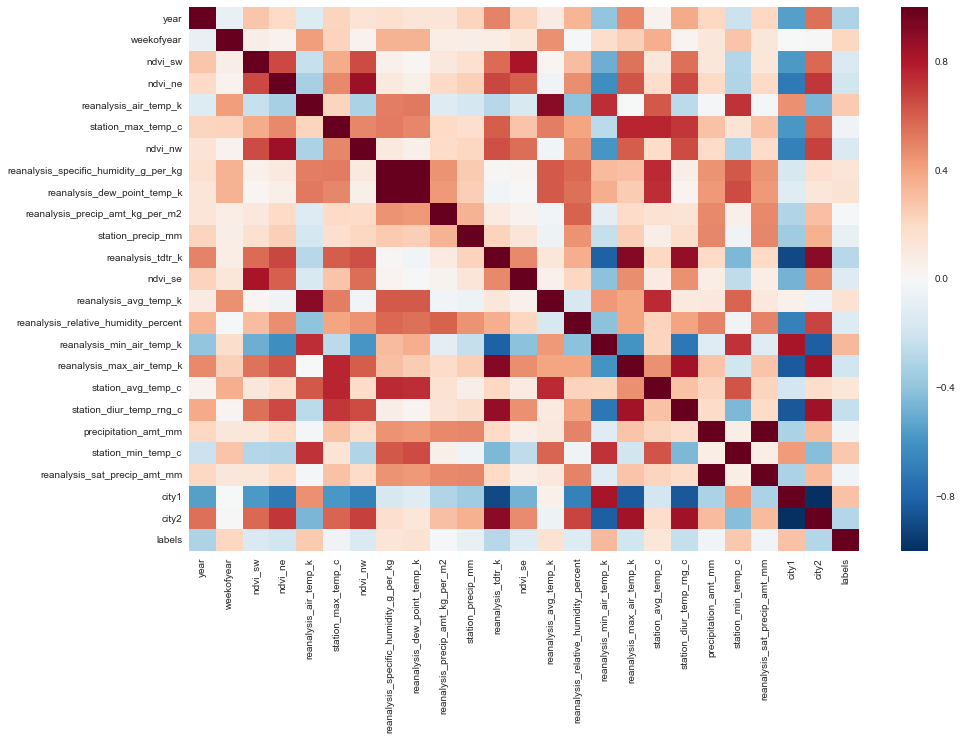

In [29]:
#We plot the correlation of features with the total_cases feature
plt.figure(figsize=(15,10))
sns.heatmap(scaled_train.corr())

In [49]:
scaled_train.columns

Index([u'year', u'weekofyear', u'ndvi_sw', u'ndvi_ne',
       u'reanalysis_air_temp_k', u'station_max_temp_c', u'ndvi_nw',
       u'reanalysis_specific_humidity_g_per_kg',
       u'reanalysis_dew_point_temp_k', u'reanalysis_precip_amt_kg_per_m2',
       u'station_precip_mm', u'reanalysis_tdtr_k', u'ndvi_se',
       u'reanalysis_avg_temp_k', u'reanalysis_relative_humidity_percent',
       u'reanalysis_min_air_temp_k', u'reanalysis_max_air_temp_k',
       u'station_avg_temp_c', u'station_diur_temp_rng_c',
       u'precipitation_amt_mm', u'station_min_temp_c',
       u'reanalysis_sat_precip_amt_mm', u'city1', u'city2', u'labels'],
      dtype='object')

In [89]:
scaled_test=scaled_test.reindex_axis(test_df.columns[indices],axis=1)

In [79]:
#Stratified K-Fold Validation
from sklearn.metrics import mean_squared_error
from math import sqrt 

rmse=[]
kfold=KFold(len(scaled_train['labels']),n_folds=10)
for train_index,val_index in kfold:
    x_train=scaled_train.ix[train_index,scaled_train.columns[0:]].drop('labels',1)
    y_train=(scaled_train.ix[train_index])['labels']
    x_val,y_val=scaled_train.ix[val_index,scaled_train.columns[0:]].drop('labels',1), scaled_train.ix[val_index]['labels']
    rf=RandomForestRegressor(n_estimators=100)
    rf.fit(x_train,y_train)
    pred_val=rf.predict(x_val)
    rmse.append(sqrt(mean_squared_error(pred_val,y_val)))
np.mean(rmse)

30.902552466841684

In [84]:
#Stratified K-Fold Validation
from sklearn.metrics import mean_squared_error
from math import sqrt 

n_columns=0
rmse2=[]
kfold=KFold(len(scaled_train['labels']),n_folds=10)
for train_index,val_index in kfold:
    x_train=scaled_train.ix[train_index].drop('labels',1)
    #print x_train
    y_train=scaled_train.ix[train_index]['labels']
    x_val,y_val=scaled_train.ix[val_index].drop('labels',1), scaled_train.ix[val_index]['labels']
    xg=xgb.XGBRegressor(n_estimators=100)
    xg.fit(x_train,y_train)
    pred_val=xg.predict(x_val)
    rmse2.append(sqrt(mean_squared_error(pred_val,y_val)))
np.mean(rmse2)

30.678122032725888

In [91]:
FINAL_PRED=xg.predict(scaled_test)

In [101]:
final_pred=np.round(FINAL_PRED)

In [104]:
xg.fit(scaled_train.drop('labels',1),scaled_train['labels'])
pred=xg.predict(scaled_test)

In [107]:
final_df=pd.DataFrame(data={'city':city,'year':year,'weekofyear':week_of_year,'total_cases':np.round(pred)})
#final_df=pd.DataFrame(data={'total_cases':FINAL_PRED})

In [108]:
final_df.to_csv('/Users/adityavyas/Desktop/dengue_.csv',header=True)

In [969]:
train_df.columns

Index([u'year', u'weekofyear', u'ndvi_ne', u'ndvi_nw', u'ndvi_se', u'ndvi_sw',
       u'precipitation_amt_mm', u'reanalysis_air_temp_k',
       u'reanalysis_avg_temp_k', u'reanalysis_dew_point_temp_k',
       u'reanalysis_max_air_temp_k', u'reanalysis_min_air_temp_k',
       u'reanalysis_precip_amt_kg_per_m2',
       u'reanalysis_relative_humidity_percent',
       u'reanalysis_sat_precip_amt_mm',
       u'reanalysis_specific_humidity_g_per_kg', u'reanalysis_tdtr_k',
       u'station_avg_temp_c', u'station_diur_temp_rng_c',
       u'station_max_temp_c', u'station_min_temp_c', u'station_precip_mm',
       u'city1', u'city2', u'labels'],
      dtype='object')

In [ ]:
sub.mean(axis=1)